In [38]:
!pip install prophet
import timeit
%matplotlib inline
import pandas as pd
from prophet import Prophet
from statsmodels.tsa.arima_model import ARIMA  # time series modeling
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams


plt.style.use('fivethirtyeight')

In [39]:

df = pd.read_csv('lab2data.csv')
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/97,...,4/30/22,5/31/22,6/30/22,7/31/22,8/31/22,9/30/22,10/31/22,11/30/22,12/31/22,1/31/23
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,109765.7560,...,276356.4793,280421.3471,284426.8053,285576.2499,284496.1795,283508.6110,281634.2213,279244.2138,276586.3233,274329.1947
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,187591.3288,...,496717.0977,505713.5475,512611.5679,512997.9737,509467.0445,505789.4802,502349.2366,498837.3238,493993.8457,490917.0441
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,89089.5541,...,193390.2651,195669.9347,198258.3402,200131.6424,200299.1346,200593.2903,201102.0964,201352.8630,200816.1555,202637.9331
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,192722.1934,...,869495.9642,883379.8542,904820.6168,907381.2980,909499.1300,904429.7167,901782.4890,906069.3390,897735.4125,895789.8059
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,178634.1284,...,785826.9629,797860.5510,812697.8791,812948.0655,812824.1253,810061.8120,807608.9519,808485.1758,801567.0108,802243.0220


In [40]:
num_rows= df.shape[0]
print(num_rows)
df.head()

29540


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/97,...,4/30/22,5/31/22,6/30/22,7/31/22,8/31/22,9/30/22,10/31/22,11/30/22,12/31/22,1/31/23
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,109765.7560,...,276356.4793,280421.3471,284426.8053,285576.2499,284496.1795,283508.6110,281634.2213,279244.2138,276586.3233,274329.1947
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,187591.3288,...,496717.0977,505713.5475,512611.5679,512997.9737,509467.0445,505789.4802,502349.2366,498837.3238,493993.8457,490917.0441
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,89089.5541,...,193390.2651,195669.9347,198258.3402,200131.6424,200299.1346,200593.2903,201102.0964,201352.8630,200816.1555,202637.9331
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,192722.1934,...,869495.9642,883379.8542,904820.6168,907381.2980,909499.1300,904429.7167,901782.4890,906069.3390,897735.4125,895789.8059
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,178634.1284,...,785826.9629,797860.5510,812697.8791,812948.0655,812824.1253,810061.8120,807608.9519,808485.1758,801567.0108,802243.0220


In [41]:
df.dropna(inplace=True)
print( df.isnull().sum().sum())
num_rows_clean = df.shape[0]
print(num_rows_clean)

0
11778


In [46]:
austin_df = df.loc[(df['Metro'] == "Austin-Round Rock-Georgetown, TX")]
austin_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/97,...,4/30/22,5/31/22,6/30/22,7/31/22,8/31/22,9/30/22,10/31/22,11/30/22,12/31/22,1/31/23
17,92593,17,78660,zip,TX,TX,Pflugerville,"Austin-Round Rock-Georgetown, TX",Travis County,176622.51880,...,4.767167e+05,4.831887e+05,4.846324e+05,4.781833e+05,4.697586e+05,4.604081e+05,4.518981e+05,4.424973e+05,4.338354e+05,4.300969e+05
102,92576,102,78641,zip,TX,TX,Leander,"Austin-Round Rock-Georgetown, TX",Williamson County,184092.38960,...,5.832194e+05,5.939308e+05,5.947985e+05,5.847771e+05,5.718518e+05,5.577290e+05,5.473070e+05,5.359564e+05,5.245321e+05,5.173051e+05
107,92551,107,78613,zip,TX,TX,Cedar Park,"Austin-Round Rock-Georgetown, TX",Williamson County,210441.87940,...,5.958754e+05,6.028278e+05,6.014778e+05,5.901876e+05,5.777489e+05,5.664334e+05,5.566561e+05,5.456356e+05,5.353055e+05,5.320779e+05
345,92654,345,78745,zip,TX,TX,Austin,"Austin-Round Rock-Georgetown, TX",Travis County,157975.36090,...,5.420184e+05,5.533090e+05,5.555734e+05,5.492826e+05,5.387522e+05,5.269758e+05,5.179552e+05,5.093215e+05,5.000501e+05,4.983432e+05
399,92597,399,78664,zip,TX,TX,Round Rock,"Austin-Round Rock-Georgetown, TX",Williamson County,161837.93200,...,4.395449e+05,4.453053e+05,4.453142e+05,4.386853e+05,4.308197e+05,4.225033e+05,4.151618e+05,4.065754e+05,3.984253e+05,3.973543e+05
452,92575,452,78640,zip,TX,TX,Kyle,"Austin-Round Rock-Georgetown, TX",Hays County,106350.47290,...,3.833408e+05,3.886546e+05,3.910403e+05,3.872136e+05,3.809669e+05,3.736842e+05,3.661842e+05,3.591471e+05,3.526828e+05,3.490948e+05
486,92662,486,78753,zip,TX,TX,Austin,"Austin-Round Rock-Georgetown, TX",Travis County,126362.36420,...,4.301515e+05,4.386786e+05,4.410293e+05,4.364822e+05,4.294986e+05,4.223487e+05,4.165168e+05,4.081180e+05,3.999476e+05,3.972813e+05
787,92651,787,78741,zip,TX,TX,Austin,"Austin-Round Rock-Georgetown, TX",Travis County,121016.34290,...,5.441293e+05,5.570146e+05,5.592819e+05,5.500047e+05,5.358366e+05,5.229939e+05,5.141061e+05,5.033606e+05,4.905093e+05,4.864424e+05
902,92617,902,78704,zip,TX,TX,Austin,"Austin-Round Rock-Georgetown, TX",Travis County,325651.53260,...,1.254385e+06,1.285403e+06,1.304059e+06,1.292811e+06,1.260137e+06,1.222554e+06,1.206123e+06,1.196649e+06,1.177677e+06,1.169840e+06
911,92653,911,78744,zip,TX,TX,Austin,"Austin-Round Rock-Georgetown, TX",Travis County,103366.98030,...,4.273524e+05,4.359690e+05,4.384018e+05,4.334417e+05,4.257716e+05,4.177508e+05,4.103472e+05,4.009548e+05,3.914928e+05,3.886594e+05


In [92]:
austin_df_transpose = austin_df.melt(id_vars=[ "RegionType","StateName",  "RegionID", "SizeRank","RegionName","State","City","Metro","CountyName"], 
        var_name="Date", 
        value_name="Value")
austin_df_transpose

,RegionType,StateName,RegionID,SizeRank,RegionName,State,City,Metro,CountyName,Date,Value
0,zip,TX,92593,17,78660,TX,Pflugerville,"Austin-Round Rock-Georgetown, TX",Travis County,1/31/97,176622.5188
1,zip,TX,92576,102,78641,TX,Leander,"Austin-Round Rock-Georgetown, TX",Williamson County,1/31/97,184092.3896
2,zip,TX,92551,107,78613,TX,Cedar Park,"Austin-Round Rock-Georgetown, TX",Williamson County,1/31/97,210441.8794
3,zip,TX,92654,345,78745,TX,Austin,"Austin-Round Rock-Georgetown, TX",Travis County,1/31/97,157975.3609
4,zip,TX,92597,399,78664,TX,Round Rock,"Austin-Round Rock-Georgetown, TX",Williamson County,1/31/97,161837.9320
...,...,...,...,...,...,...,...,...,...,...,...
15645,zip,TX,92630,15754,78719,TX,Austin,"Austin-Round Rock-Georgetown, TX",Travis County,1/31/23,409163.4047
15646,zip,TX,92583,16281,78650,TX,McDade,"Austin-Round Rock-Georgetown, TX",Bastrop County,1/31/23,498697.9080
15647,zip,TX,92652,18294,78742,TX,Austin,"Austin-Round Rock-Georgetown, TX",Travis County,1/31/23,416351.2934
15648,zip,TX,92553,19227,78615,TX,Coupland,"Austin-Round Rock-Georgetown, TX",Williamson County,1/31/23,518002.7446


In [94]:
df_austin1 = austin_df_transpose.drop(['RegionType','StateName','RegionID','SizeRank','State','City','Metro','CountyName'], axis=1)
df_austin = df_austin.set_index('Date', inplace = True)





AttributeError: 'NoneType' object has no attribute 'head'

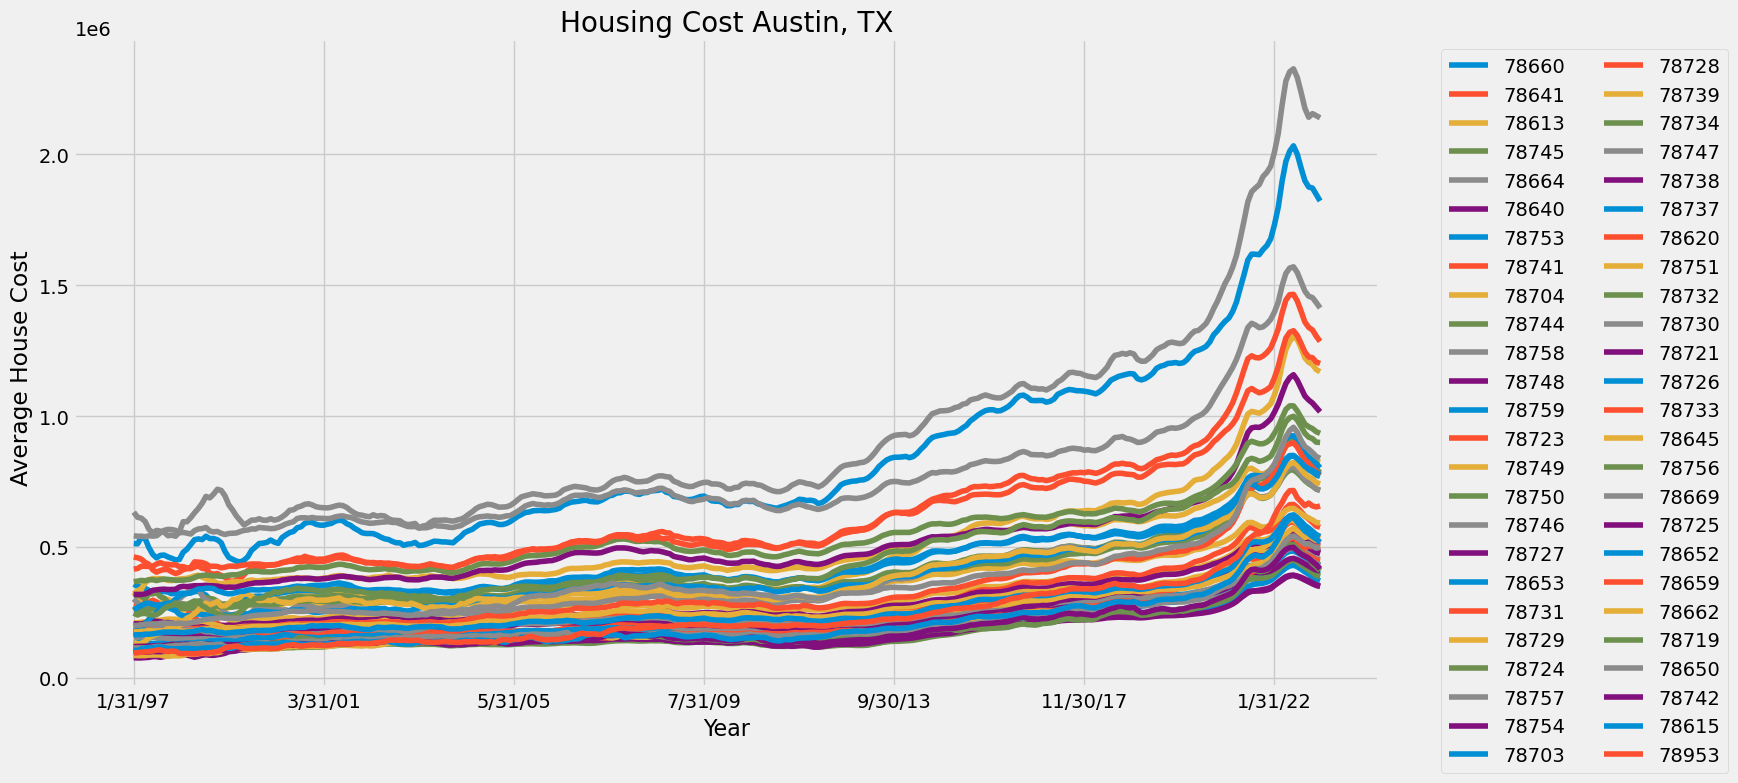

In [96]:
for RegionName in df_austin1.RegionName.unique():
    temp_df = df_austin1[df_austin1.RegionName== RegionName]
    temp_df['Value'].plot(figsize = (15,8), label=RegionName)

plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', ncol=2)
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Average House Cost ")
plt.title('Housing Cost Austin, TX', fontsize = 20);

In [245]:
zipcodes = df_austin1.RegionName.unique()


In [247]:
zip_dfs = []
zip_list = zipcodes
for x in zip_list:
    zip_dfs.append(pd.DataFrame(df_austin1[df_austin1['RegionName']==x][['Value']].copy()))

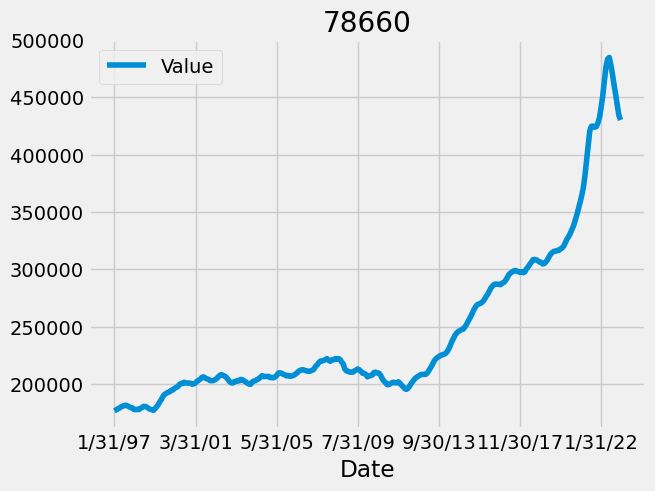

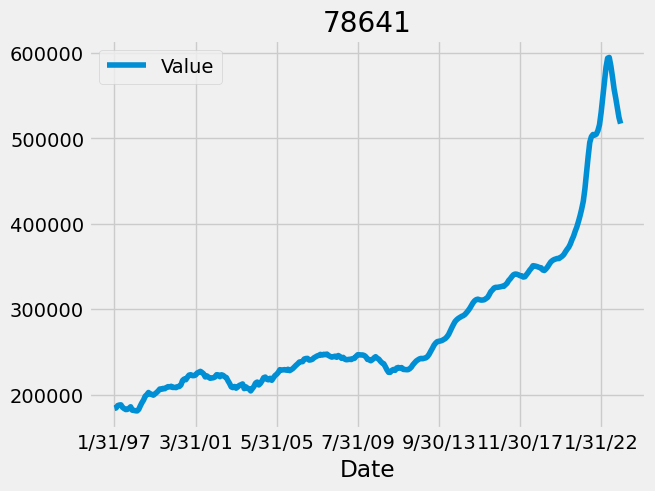

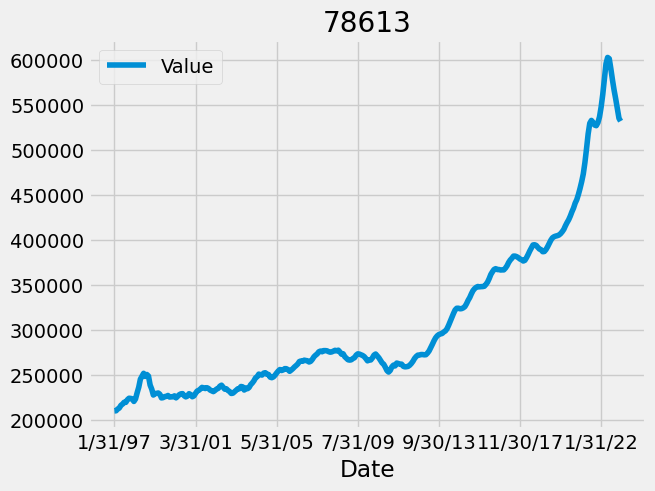

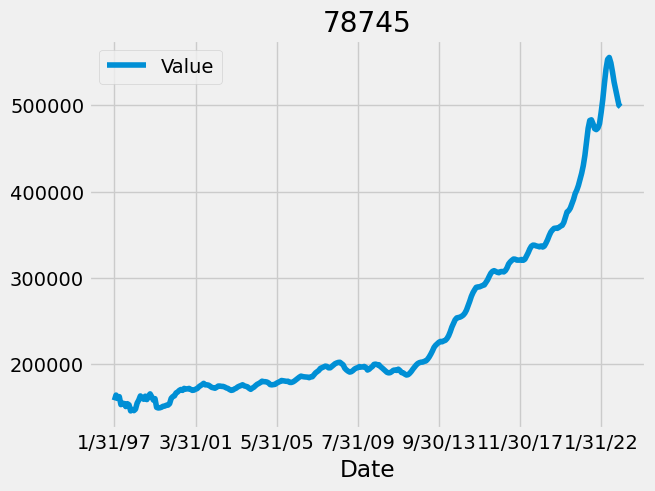

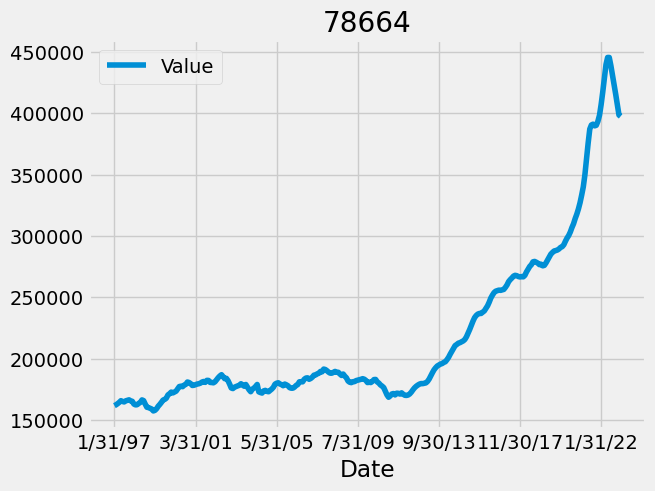

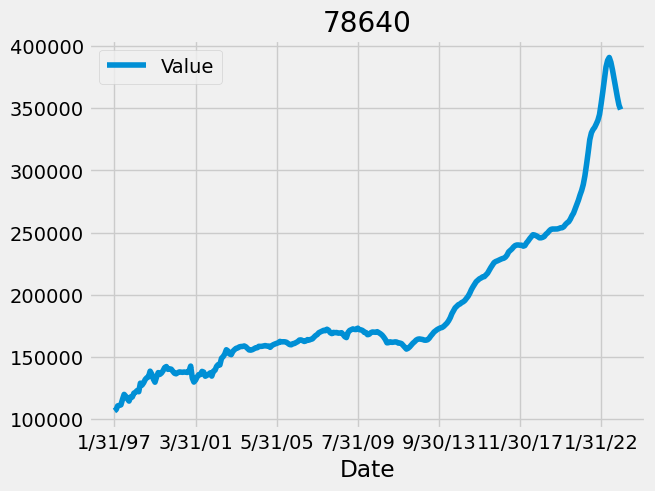

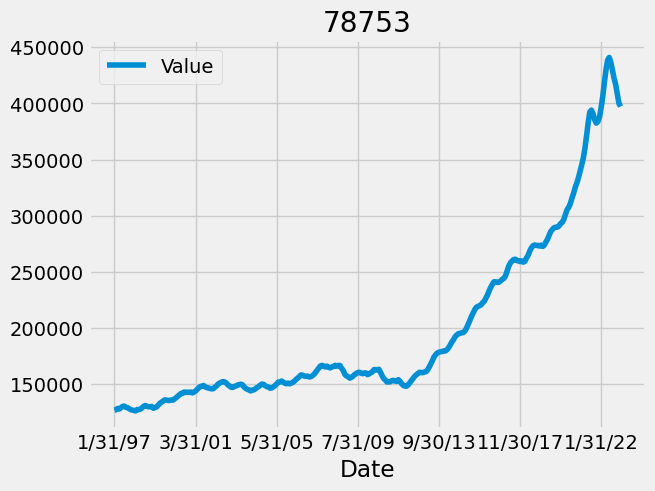

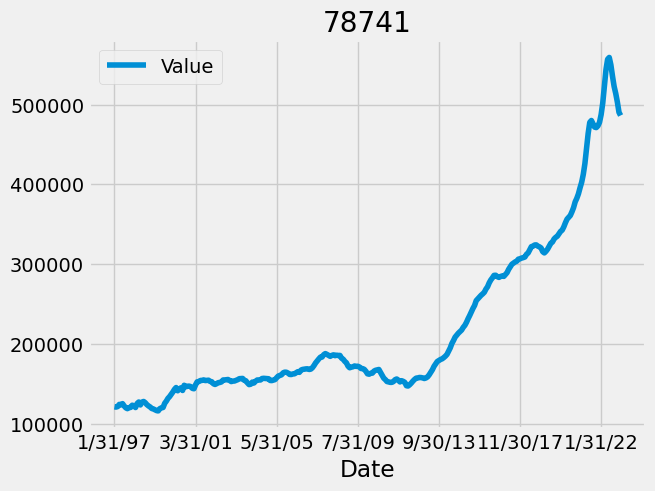

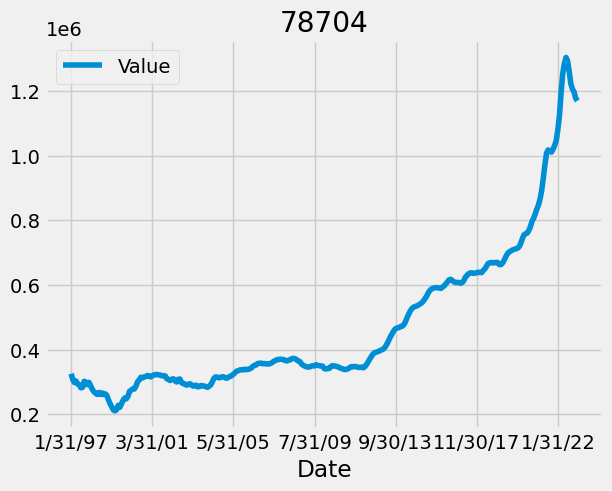

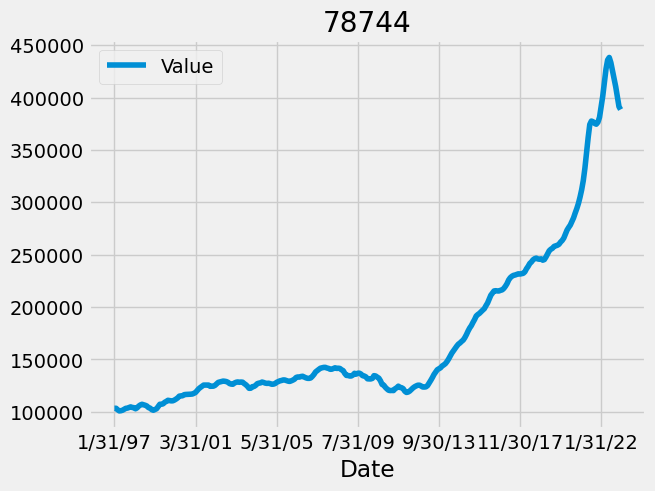

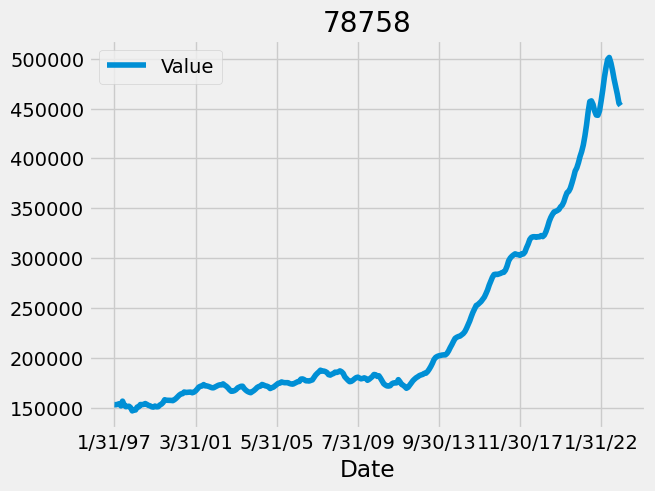

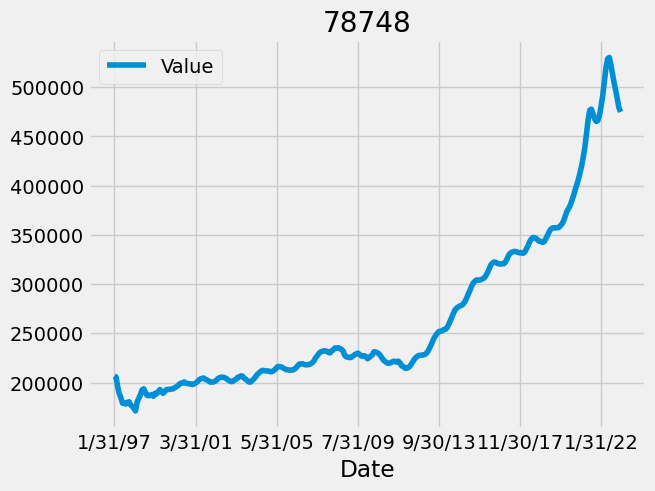

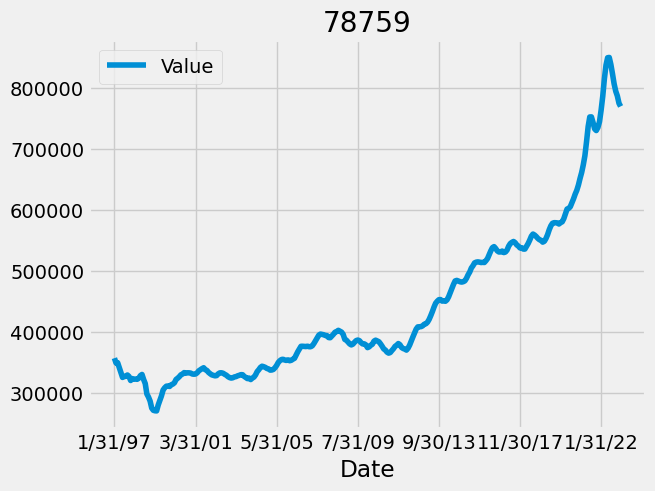

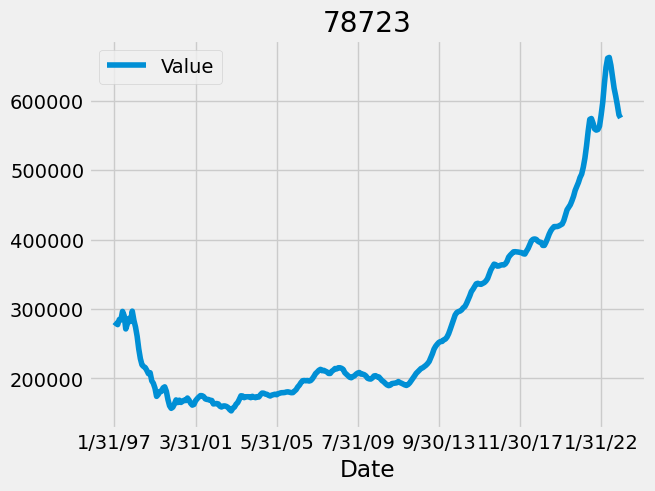

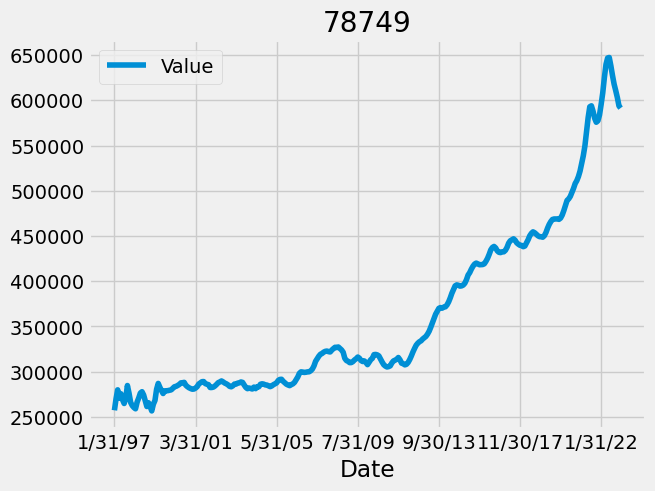

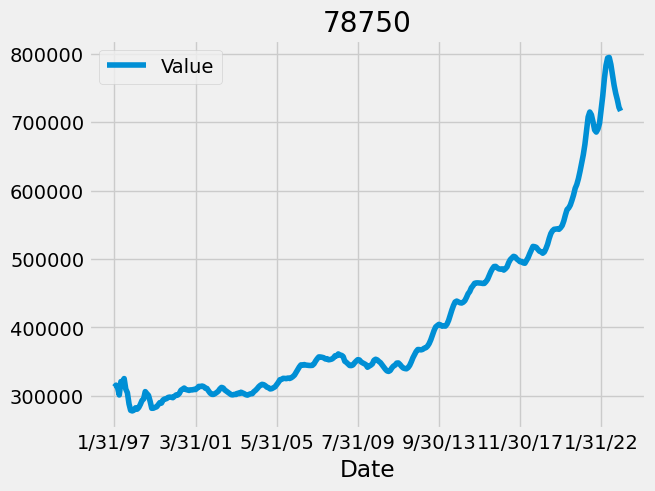

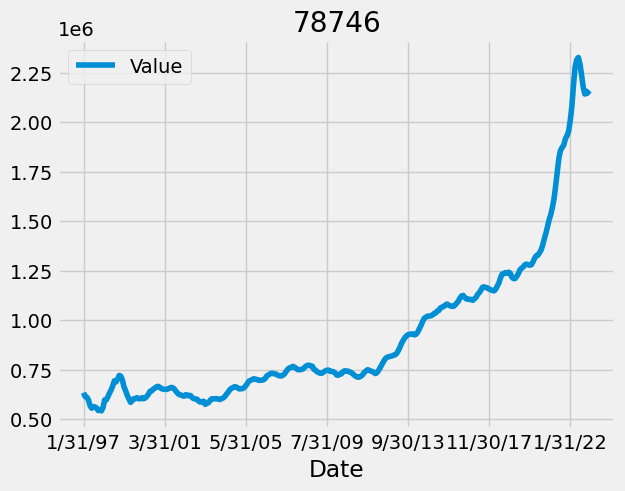

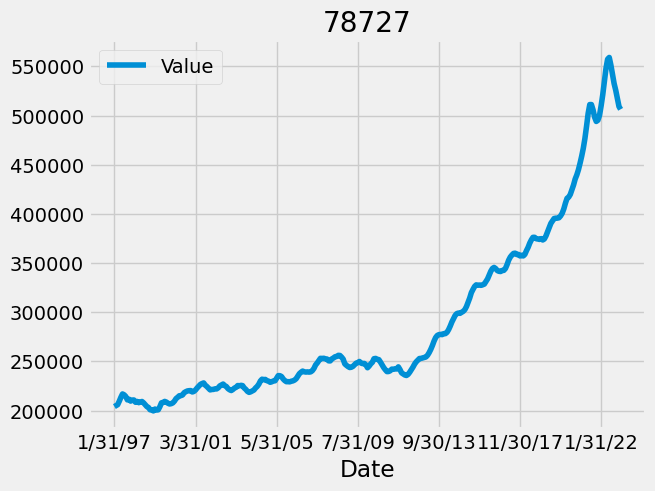

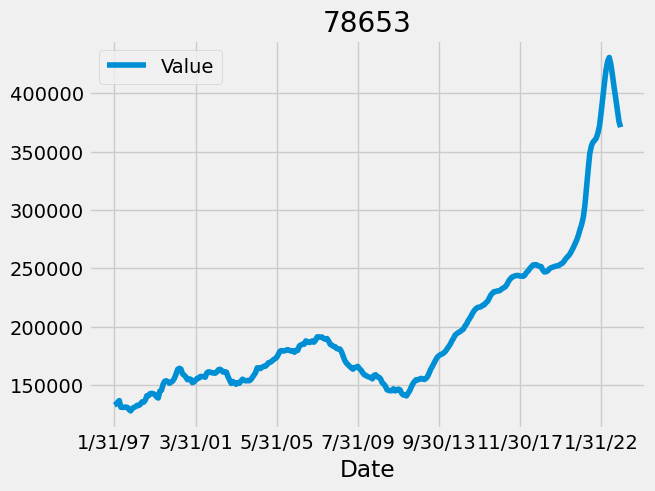

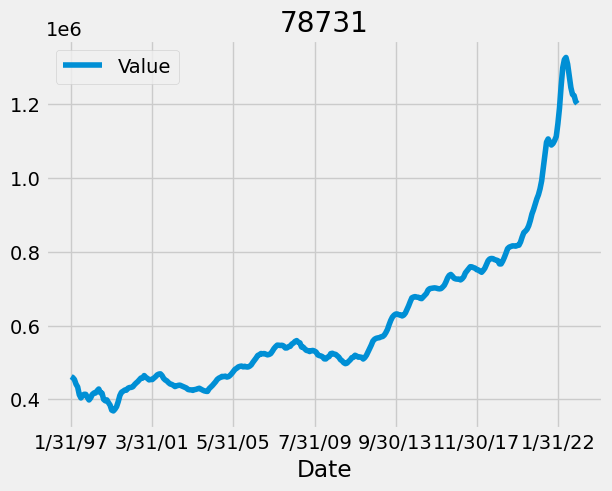

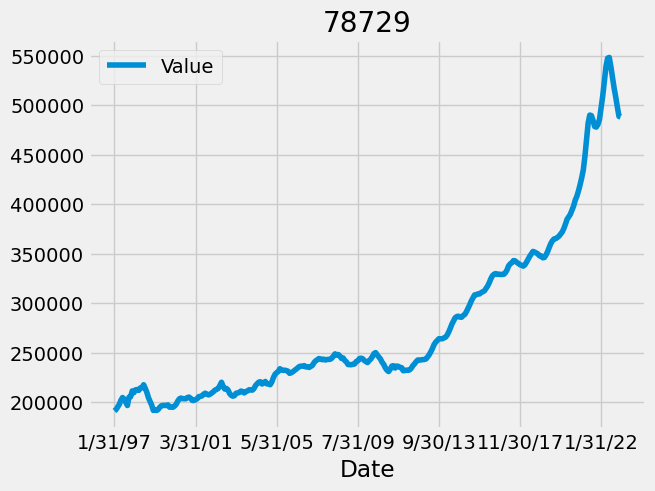

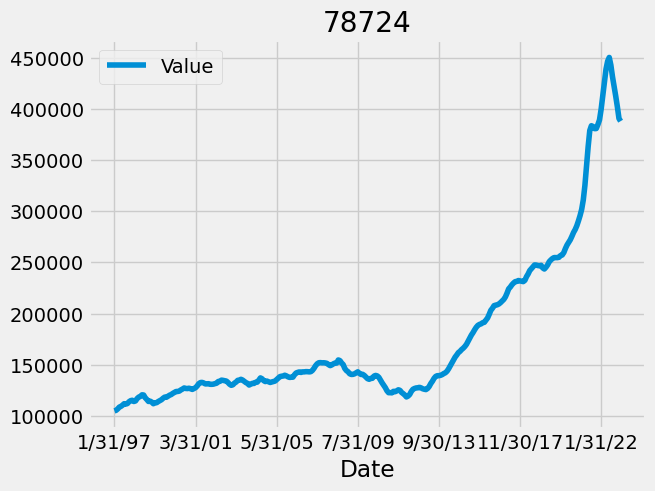

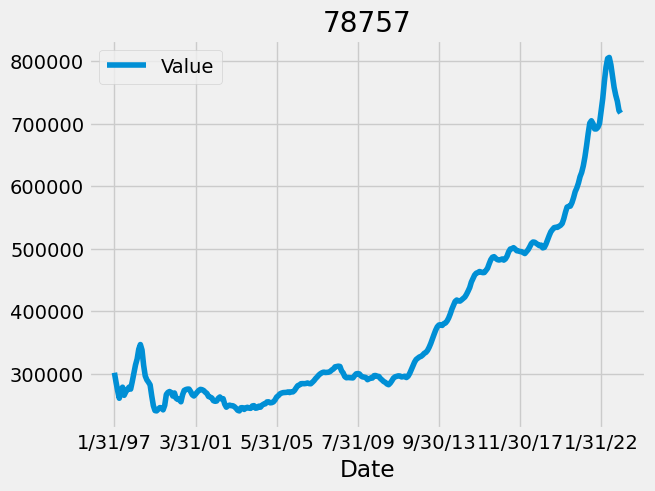

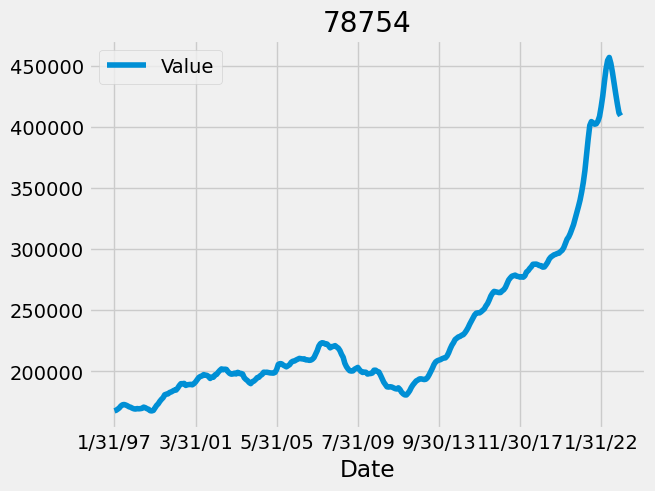

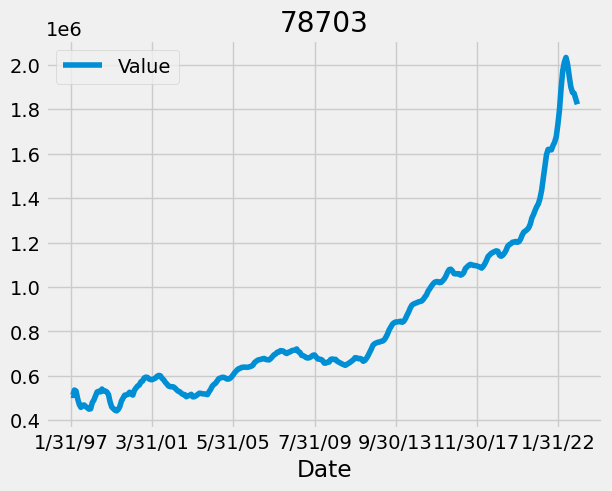

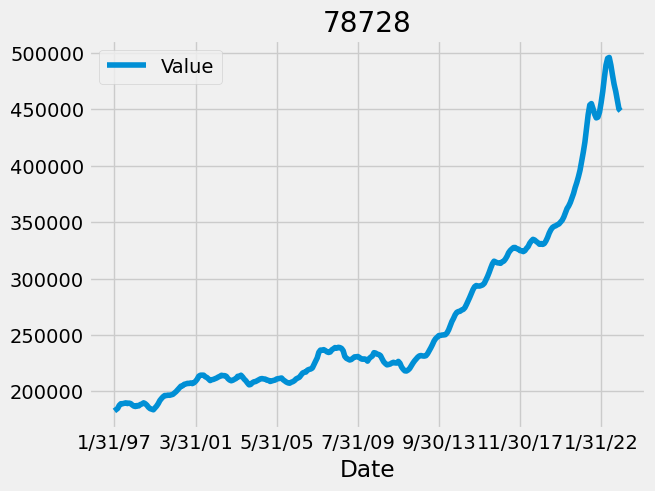

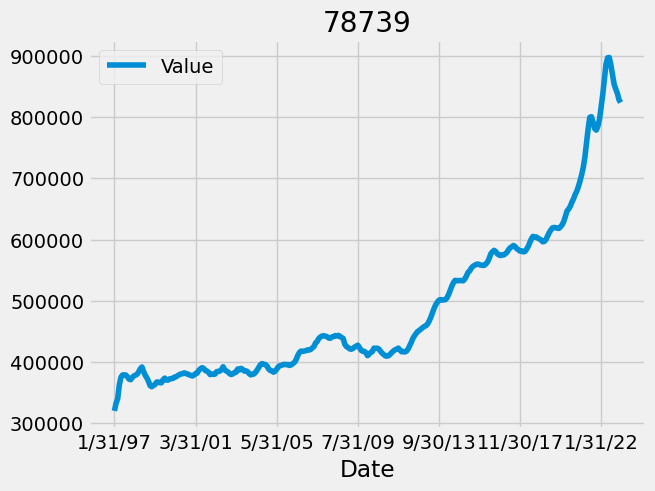

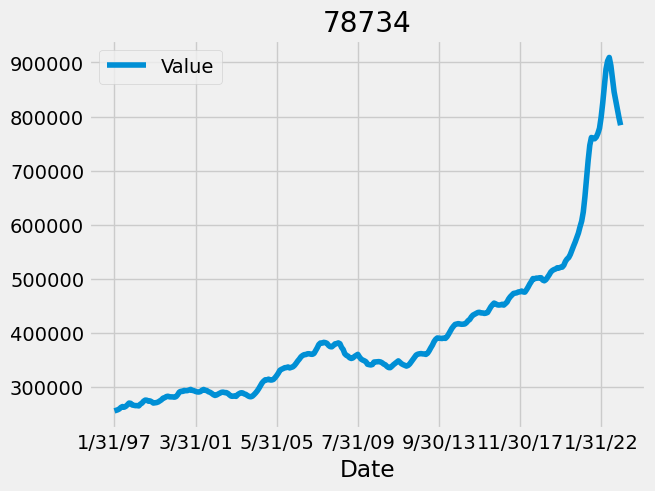

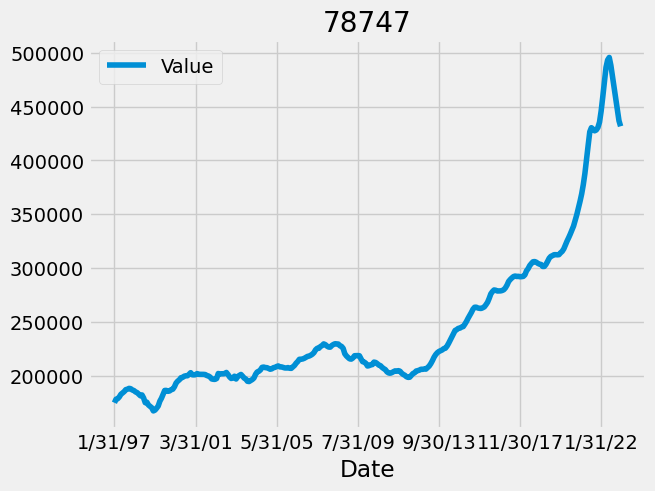

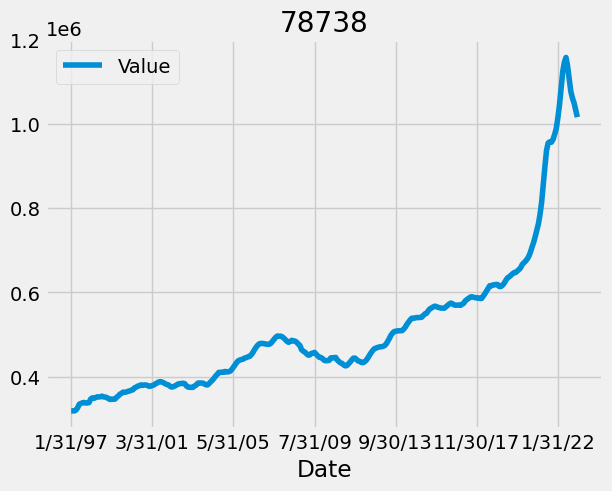

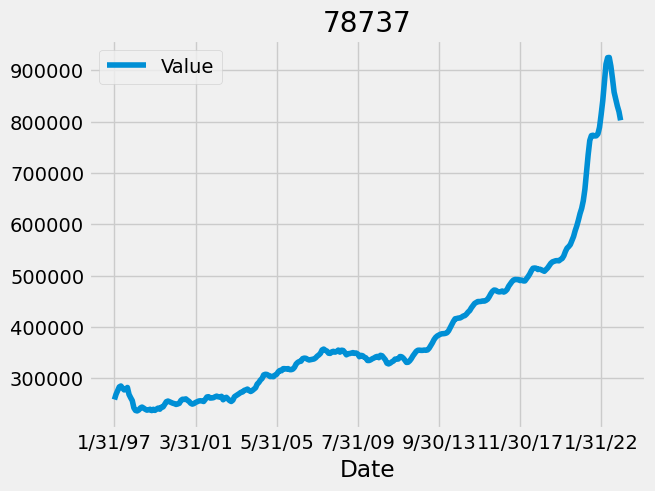

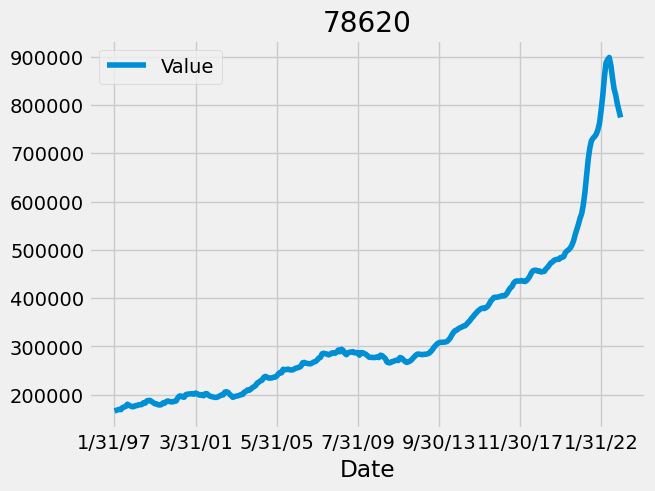

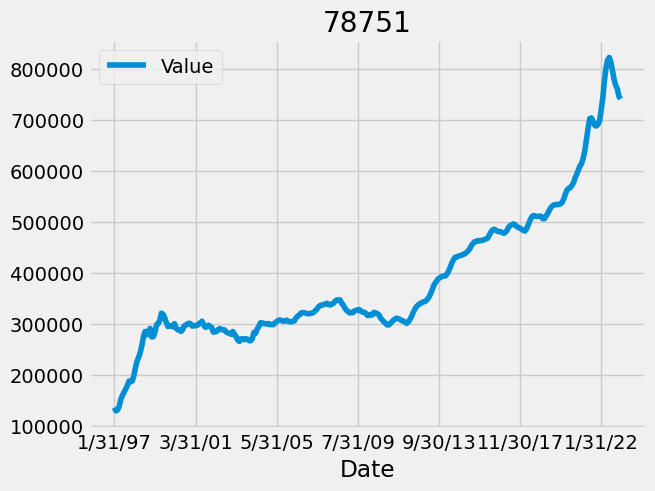

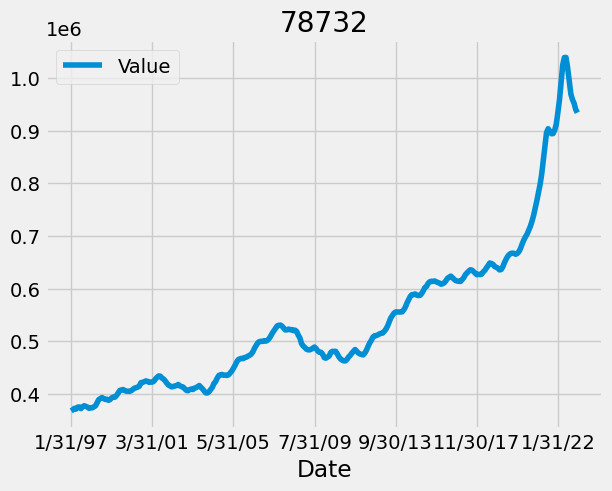

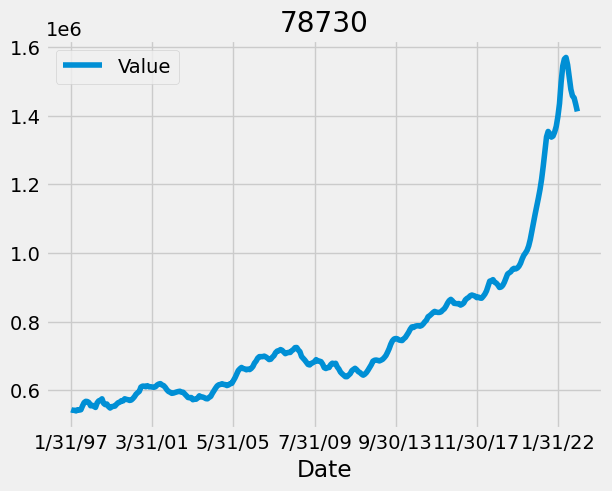

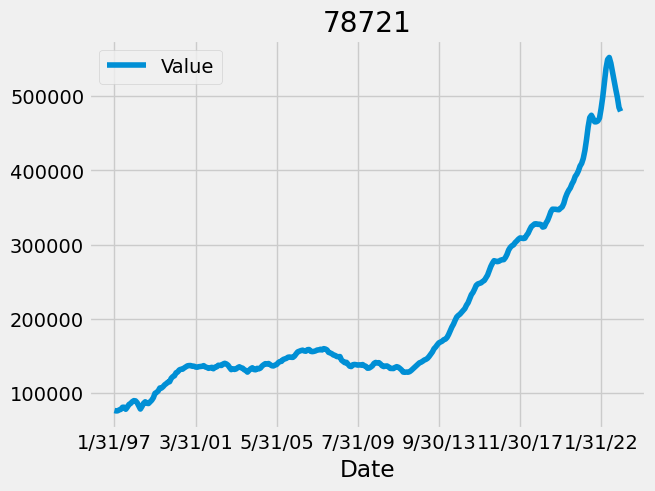

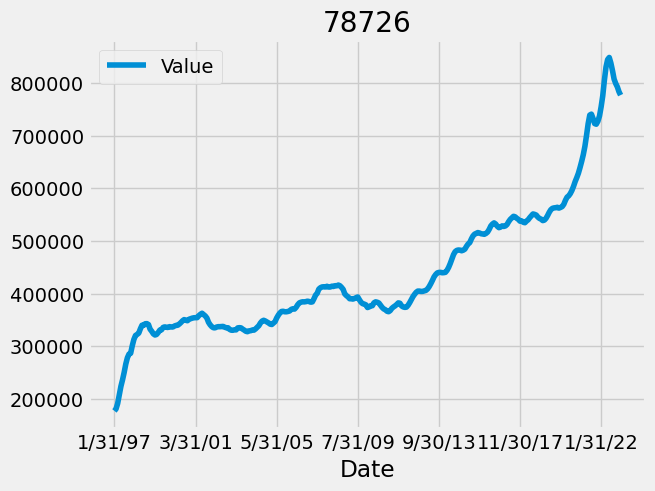

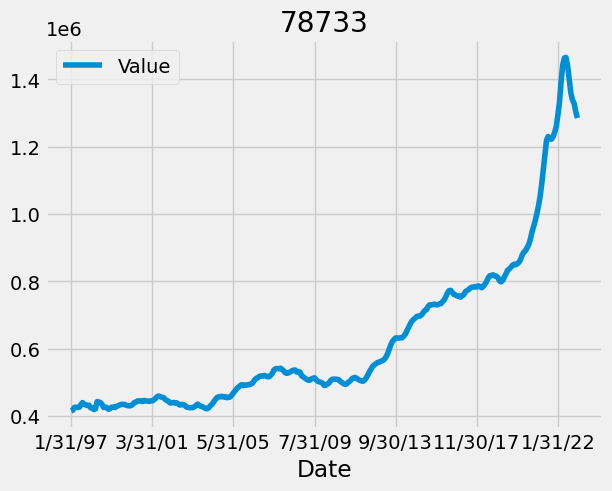

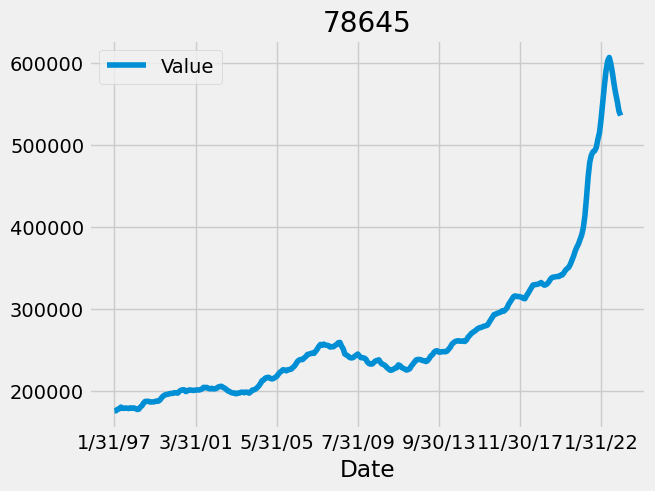

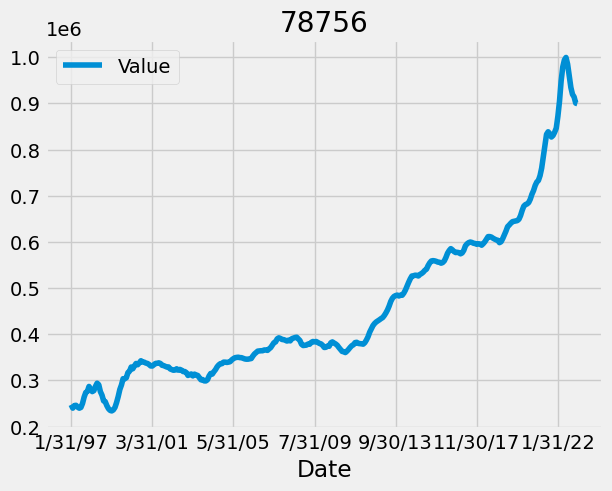

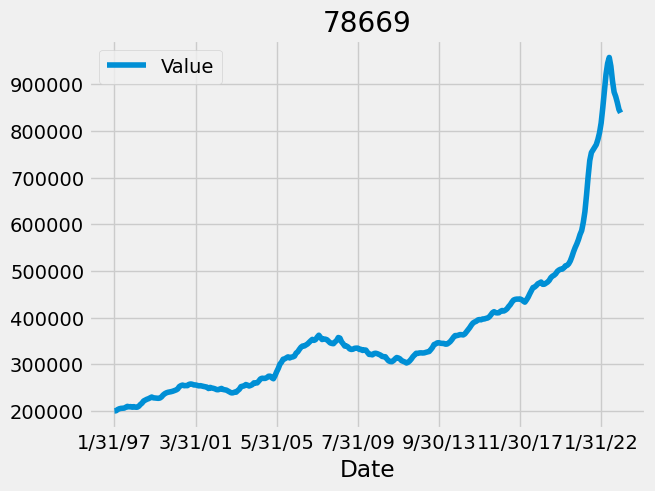

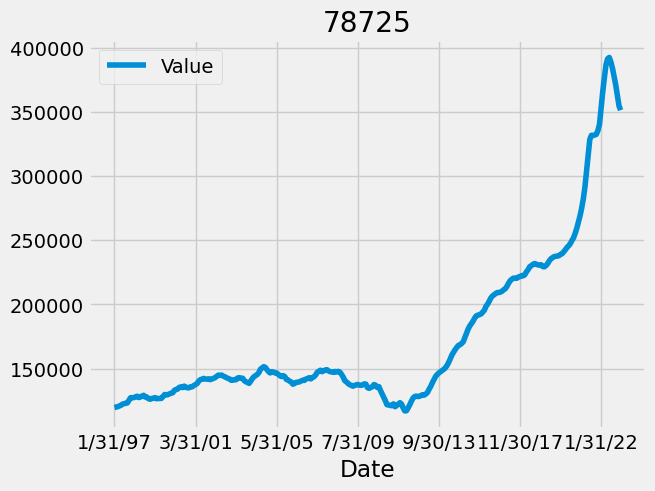

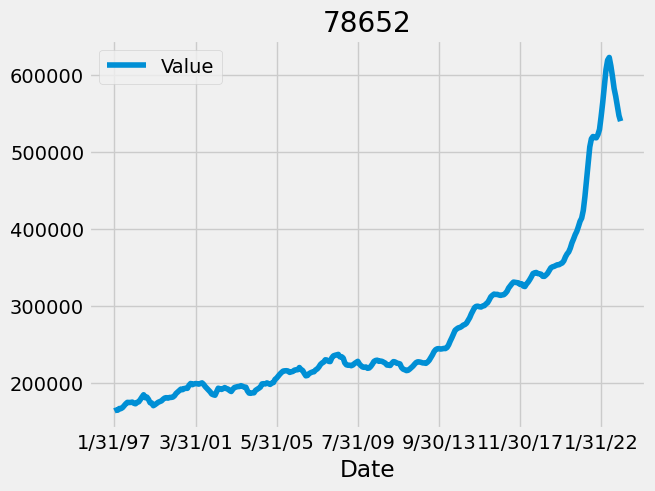

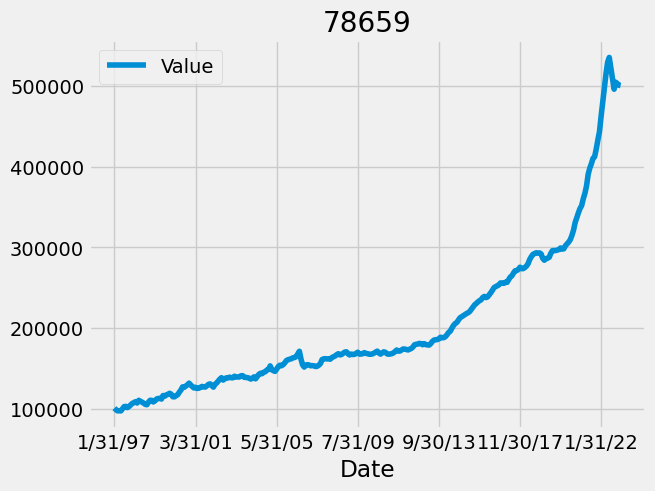

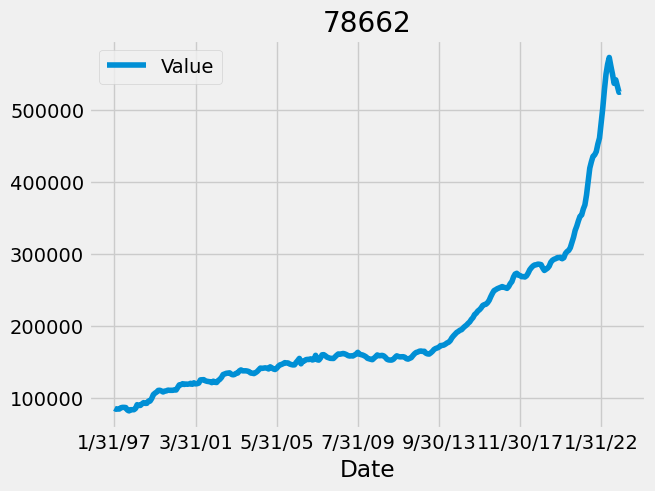

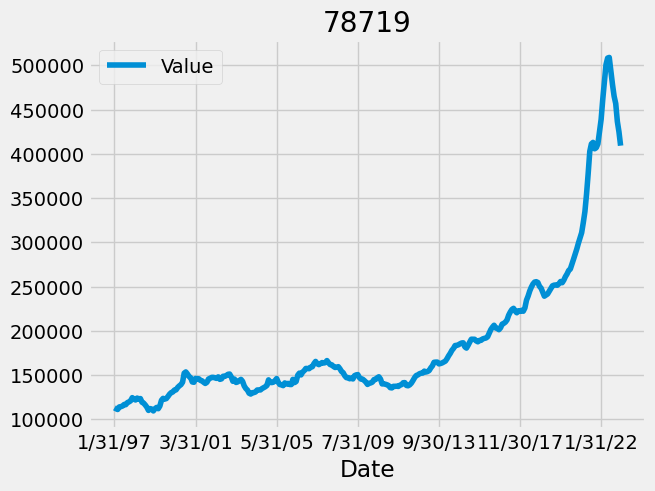

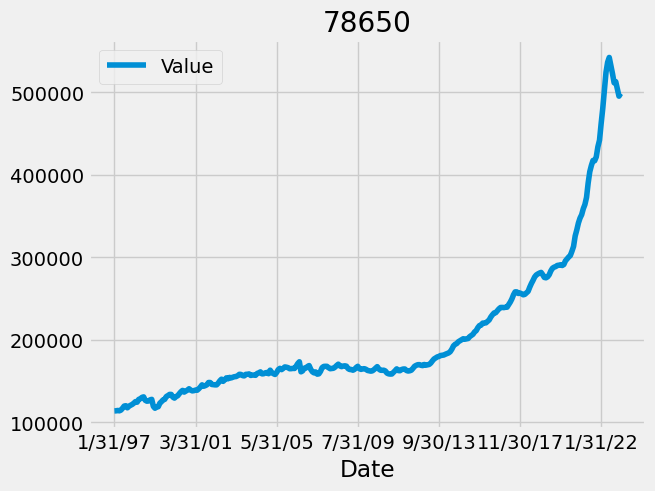

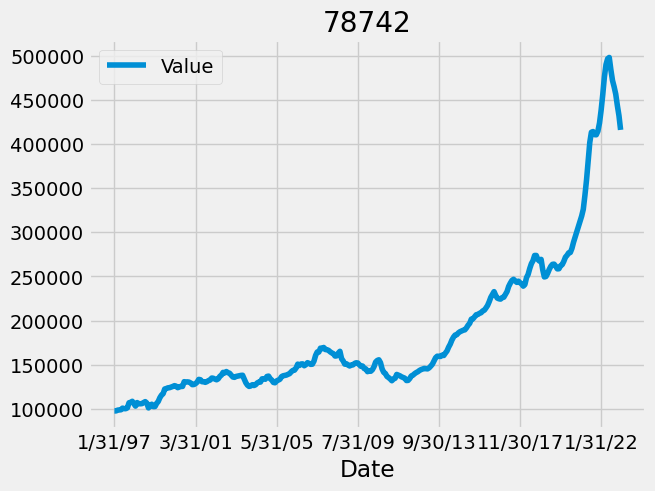

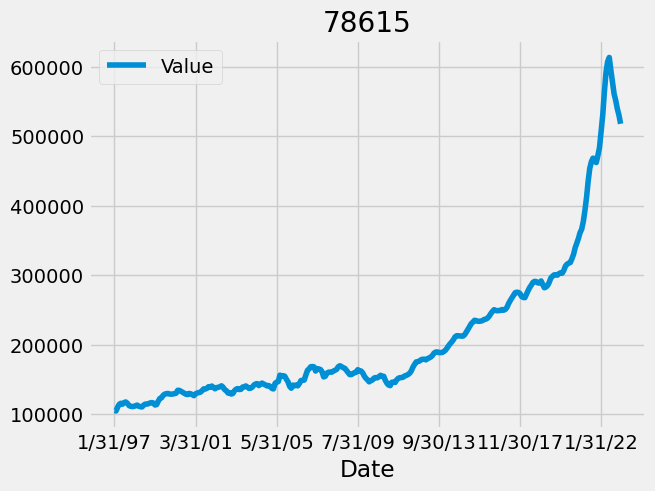

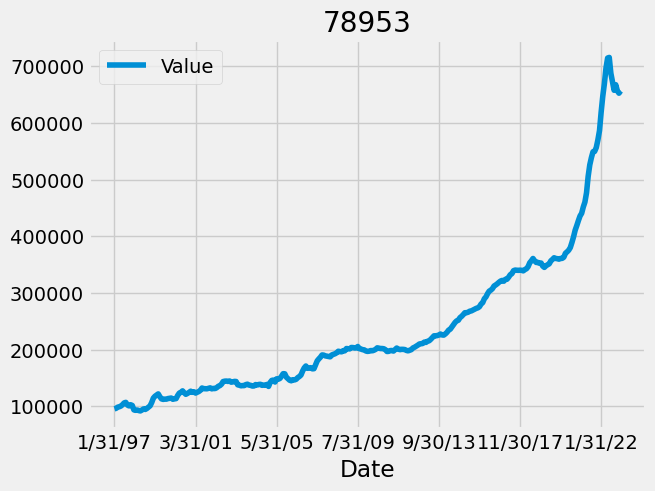

In [248]:
for df, name in zip(zip_dfs, zip_list):
    df.plot()
    plt.title(name)
    plt.show()

In [220]:
austin_df_transpose = austin_df.melt(id_vars=[ "RegionType","StateName",  "RegionID", "SizeRank","RegionName","State","City","Metro","CountyName"], 
        var_name="Date", 
        value_name="Value")
austin_df_transpose

,RegionType,StateName,RegionID,SizeRank,RegionName,State,City,Metro,CountyName,Date,Value
0,zip,TX,92593,17,78660,TX,Pflugerville,"Austin-Round Rock-Georgetown, TX",Travis County,1/31/97,176622.5188
1,zip,TX,92576,102,78641,TX,Leander,"Austin-Round Rock-Georgetown, TX",Williamson County,1/31/97,184092.3896
2,zip,TX,92551,107,78613,TX,Cedar Park,"Austin-Round Rock-Georgetown, TX",Williamson County,1/31/97,210441.8794
3,zip,TX,92654,345,78745,TX,Austin,"Austin-Round Rock-Georgetown, TX",Travis County,1/31/97,157975.3609
4,zip,TX,92597,399,78664,TX,Round Rock,"Austin-Round Rock-Georgetown, TX",Williamson County,1/31/97,161837.9320
...,...,...,...,...,...,...,...,...,...,...,...
15645,zip,TX,92630,15754,78719,TX,Austin,"Austin-Round Rock-Georgetown, TX",Travis County,1/31/23,409163.4047
15646,zip,TX,92583,16281,78650,TX,McDade,"Austin-Round Rock-Georgetown, TX",Bastrop County,1/31/23,498697.9080
15647,zip,TX,92652,18294,78742,TX,Austin,"Austin-Round Rock-Georgetown, TX",Travis County,1/31/23,416351.2934
15648,zip,TX,92553,19227,78615,TX,Coupland,"Austin-Round Rock-Georgetown, TX",Williamson County,1/31/23,518002.7446


In [236]:
df_austin_pred = austin_df_transpose.drop(['RegionType','StateName','RegionID','SizeRank','State','City','Metro','CountyName'], axis=1)
df_austin_pred

,RegionName,Date,Value
0,78660,1/31/97,176622.5188
1,78641,1/31/97,184092.3896
2,78613,1/31/97,210441.8794
3,78745,1/31/97,157975.3609
4,78664,1/31/97,161837.9320
...,...,...,...
15645,78719,1/31/23,409163.4047
15646,78650,1/31/23,498697.9080
15647,78742,1/31/23,416351.2934
15648,78615,1/31/23,518002.7446


In [237]:
train_data = df_austin_pred.loc["1997-01-31":"2017-12-31"]
test_data = df_austin_pred.loc["1998-01-31":"2018-12-31"]
train_data

,RegionName,Date,Value
1998,78615,4/30/00,134216.1242
1999,78953,4/30/00,118887.2864
2000,78660,5/31/00,199622.0652
2001,78641,5/31/00,209759.3606
2002,78613,5/31/00,228446.6103
2003,78745,5/31/00,169549.6310
2004,78664,5/31/00,177382.9354
2005,78640,5/31/00,137753.5363
2006,78753,5/31/00,139965.5215
2007,78741,5/31/00,143310.0375


In [108]:
print(f"Number of months in train data: {len(train_data)}")
print(f"Number of months in test data: {len(test_data)}")

Number of months in train data: 20
Number of months in test data: 20


In [110]:
train_data = train_data.rename(index=str, columns={"Value": "y", "Date": "ds"})
train_data.head()

,RegionName,ds,y
1998,78615,4/30/00,134216.1242
1999,78953,4/30/00,118887.2864
2000,78660,5/31/00,199622.0652
2001,78641,5/31/00,209759.3606
2002,78613,5/31/00,228446.6103


In [114]:
m = Prophet()
m.fit(train_data)





14:04:34 - cmdstanpy - INFO - Chain [1] start processing
14:04:34 - cmdstanpy - INFO - Chain [1] done processing


In [119]:
df_austin_pred = df_austin_pred.rename(index=str, columns={"Value": "y", "Date": "ds"})

df_austin_pred.head()




,RegionName,ds,y
0,78660,1/31/97,176622.5188
1,78641,1/31/97,184092.3896
2,78613,1/31/97,210441.8794
3,78745,1/31/97,157975.3609
4,78664,1/31/97,161837.9320


In [120]:

zillow_model = Prophet(interval_width=0.95)
zillow_model.fit(df_austin_pred)

14:07:58 - cmdstanpy - INFO - Chain [1] start processing
14:08:01 - cmdstanpy - INFO - Chain [1] done processing


In [116]:
future = m.make_future_dataframe(periods=21, freq='MS') 
future.head()


,ds
0,2000-04-30
1,2000-05-31
2,2000-06-01
3,2000-07-01
4,2000-08-01


In [123]:
future_dates = zillow_model.make_future_dataframe(periods=12, freq='M')
forecast_dates = future_dates[(future_dates['ds'] >= '2018-01-31') & (future_dates['ds'] <= '2018-12-31')]
future_dates

,ds
0,1997-01-31
1,1997-02-28
2,1997-03-31
3,1997-04-30
4,1997-05-31
...,...
320,2023-09-30
321,2023-10-31
322,2023-11-30
323,2023-12-31


In [125]:
forecast = zillow_model.predict(forecast_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7,2018-08-31,445839.218159,80649.134782,804674.396955
8,2018-09-30,448846.252885,100179.659893,829339.072776
9,2018-10-31,452181.052886,60404.924991,806512.055731
10,2018-11-30,455000.573497,101559.859292,814059.618454
11,2018-12-31,457774.246200,103378.218793,798099.884002


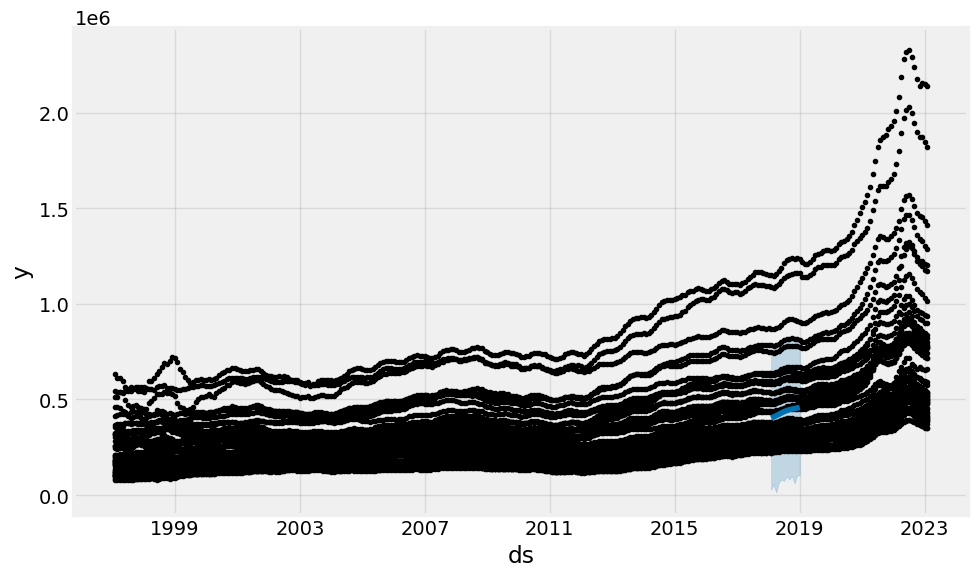

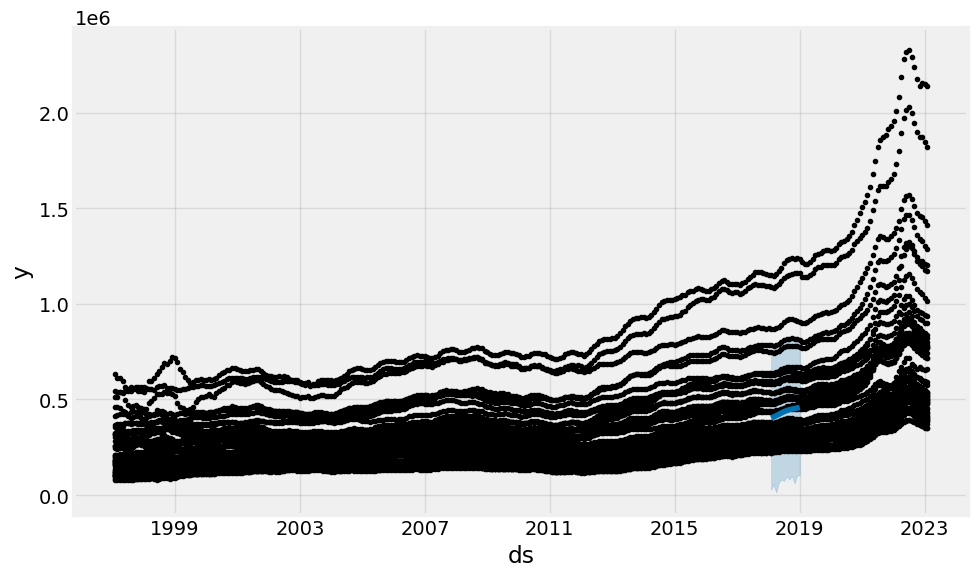

In [126]:
zillow_model.plot(forecast, uncertainty=True)

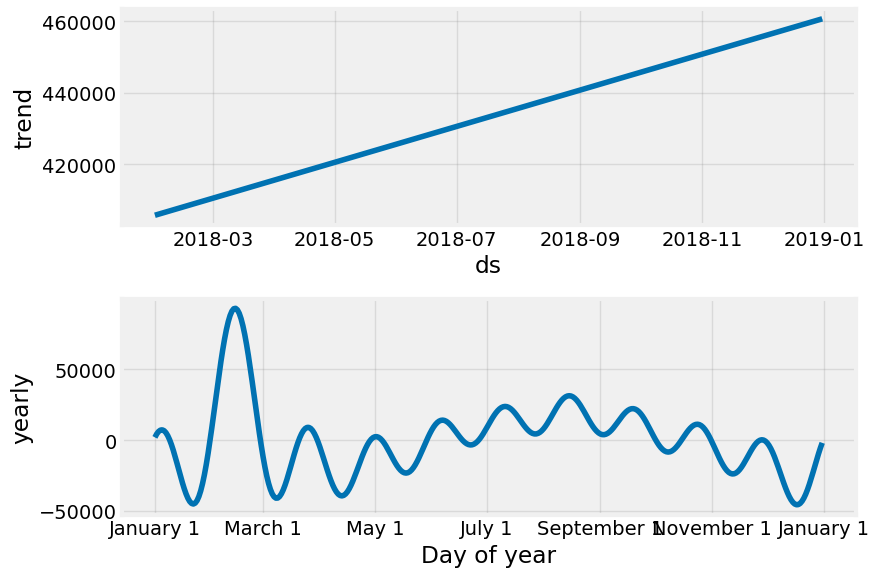

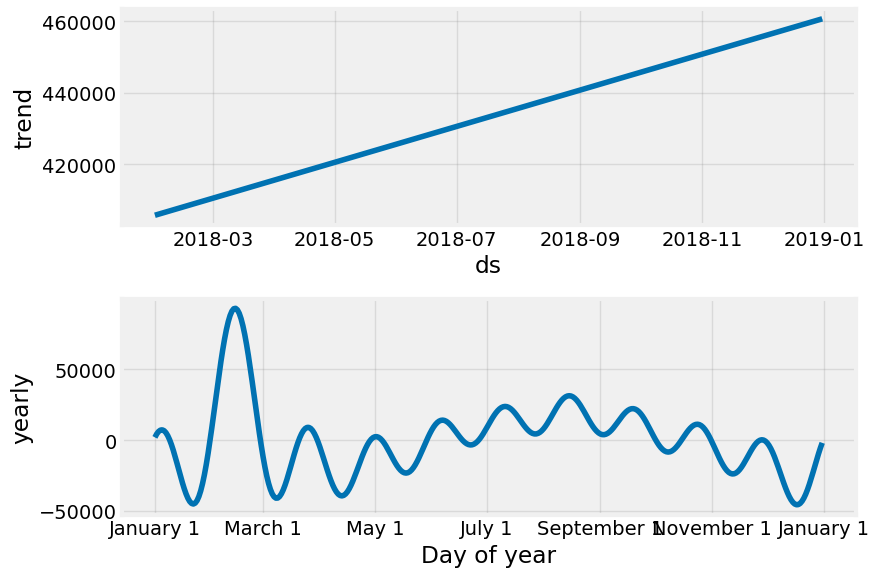

In [127]:
zillow_model.plot_components(forecast)


In [271]:


df_austin_pred

,RegionName,Date,Value
0,78660,1/31/97,176622.5188
1,78641,1/31/97,184092.3896
2,78613,1/31/97,210441.8794
3,78745,1/31/97,157975.3609
4,78664,1/31/97,161837.9320
...,...,...,...
15645,78719,1/31/23,409163.4047
15646,78650,1/31/23,498697.9080
15647,78742,1/31/23,416351.2934
15648,78615,1/31/23,518002.7446


In [169]:
data_atx = pd.read_csv('dataset.csv')
format = '%m/%d/%y'
data_atx['Datetime'] = pd.to_datetime(data_atx['Date'], format=format)
data_atx = data_atx.set_index(pd.DatetimeIndex(data_atx['Datetime']))
data_atx

,Date,Value,Datetime
Datetime,,,
1997-01-31,1/31/97,176622.5188,1997-01-31
1997-01-31,1/31/97,184092.3896,1997-01-31
1997-01-31,1/31/97,210441.8794,1997-01-31
1997-01-31,1/31/97,157975.3609,1997-01-31
1997-01-31,1/31/97,161837.9320,1997-01-31
...,...,...,...
2023-01-31,1/31/23,409163.4047,2023-01-31
2023-01-31,1/31/23,498697.9080,2023-01-31
2023-01-31,1/31/23,416351.2934,2023-01-31


In [173]:
print(groups)

ValueError: num must be 1 <= num <= 18, not 0

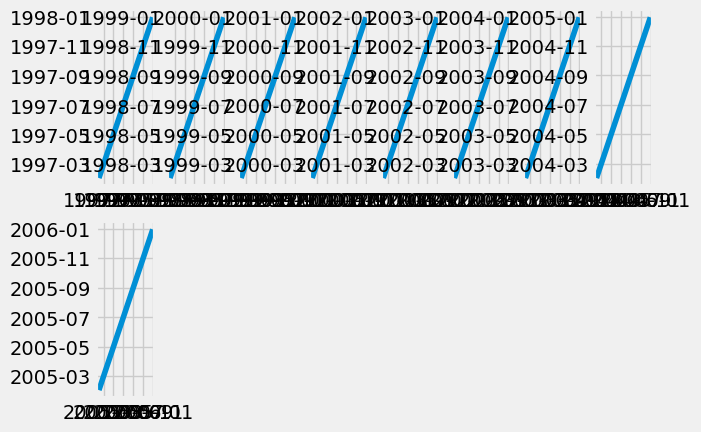

In [186]:
from pandas import DataFrame
from pandas import Grouper

groups = data_atx['Datetime'].groupby(pd.Grouper(freq = 'Y'))
years = DataFrame()
plt.figure()
i = 1
n_groups = len(groups)
for name, group in groups:
	plt.subplot((n_groups*10) + 10 + i)
	i += 1
	plt.plot(group)
plt.show()
print(years)
print(groups)

UFuncTypeError: ufunc 'multiply' cannot use operands with types dtype('<M8[ns]') and dtype('float64')

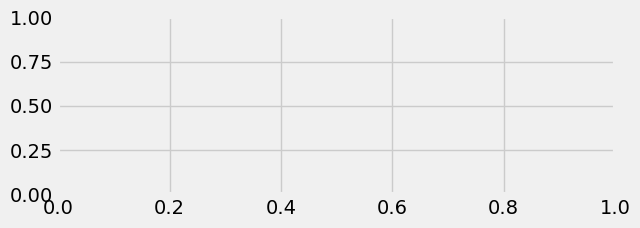

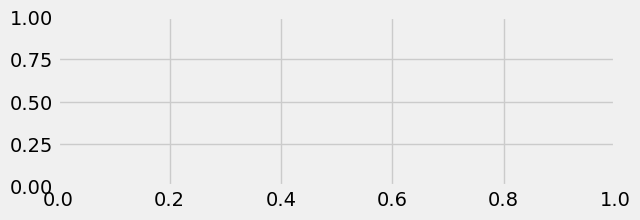

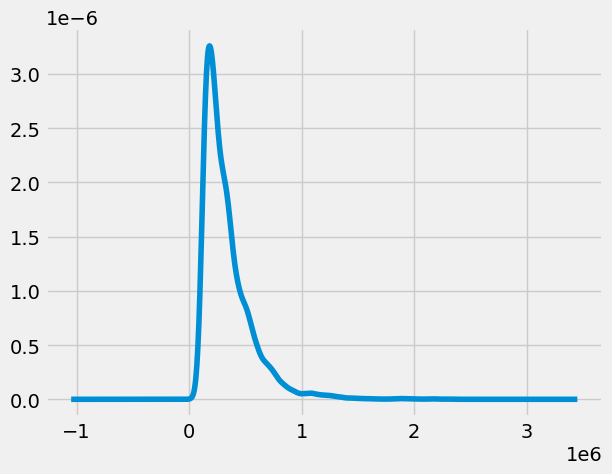

In [185]:
plt.figure(1)
plt.subplot(211)
data_atx.hist()
plt.subplot(212)
data_atx.plot(kind='kde')
plt.show()

In [139]:

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return pd.Series(diff)


""" = df_austin_pred.values
X = X.astype('float32')
# difference data
weeks_in_year = 52
stationary = difference(X, weeks_in_year)
stationary.index = df_austin_pred.index[weeks_in_year:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
# save
# plot
stationary.plot()
plt.show()
"""

" = df_austin_pred.values\nX = X.astype('float32')\n# difference data\nweeks_in_year = 52\nstationary = difference(X, weeks_in_year)\nstationary.index = df_austin_pred.index[weeks_in_year:]\n# check if stationary\nresult = adfuller(stationary)\nprint('ADF Statistic: %f' % result[0])\nprint('p-value: %f' % result[1])\nprint('Critical Values:')\nfor key, value in result[4].items():\n\tprint('\t%s: %.3f' % (key, value))\n# save\n# plot\nstationary.plot()\nplt.show()\n"

In [287]:
for pindex in range(2):
    for qindex in range(2):
        p = pindex + 1
        q = qindex + 1
        zillow_arima_model = sm.tsa.arima.ARIMA(df_austin_pred['y'], order = (p,1,q)).fit()
        print('AR:', p, 'MA:', q, 'AIC:', zillow_arima_model.aic)
# for first differenced ER models searched, AR p=2 MA q=2 is best
ER_arima_model_selected = sm.tsa.arima.ARIMA(df_austin_pred['y'], order = (2,1,2)).fit()
# fitted parameters of the selected model
print(ER_arima_model_selected.params)
# look-ahead forecasts needed 

KeyError: 'y'

In [289]:
train_data = data_atx.loc["1/31/97":"12/31/97"]
test_data = data_atx.loc["1998-01-31":"1998-01-31"]


train_data['Date'] = pd.to_datetime(train_data['Date'], format='%m/%d/%y')
train_data

/var/folders/83/th0nqdn129x2p_9y6f6w9k5w0000gn/T/ipykernel_50162/58343680.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Date'] = pd.to_datetime(train_data['Date'], format='%m/%d/%y')


,Date,Value,Datetime
Datetime,,,
1997-01-31,1997-01-31,176622.5188,1997-01-31
1997-01-31,1997-01-31,184092.3896,1997-01-31
1997-01-31,1997-01-31,210441.8794,1997-01-31
1997-01-31,1997-01-31,157975.3609,1997-01-31
1997-01-31,1997-01-31,161837.9320,1997-01-31
...,...,...,...
1997-12-31,1997-12-31,124537.1574,1997-12-31
1997-12-31,1997-12-31,121949.9609,1997-12-31
1997-12-31,1997-12-31,108363.6851,1997-12-31


In [290]:
for pindex in range(2):
    for qindex in range(2):
        p = pindex + 1
        q = qindex + 1
        zillow_arima_model = sm.tsa.arima.ARIMA(train_data['Date'], order = (p,1,q)).fit()
        print('AR:', p, 'MA:', q, 'AIC:', zillow_arima_model.aic)
# for first differenced ER models searched, AR p=2 MA q=2 is best
ER_arima_model_selected = sm.tsa.arima.ARIMA(train_data['Date'], order = (2,1,2)).fit()
# fitted parameters of the selected model
print(ER_arima_model_selected.params)
# look-ahead forecasts needed 

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


UFuncTypeError: ufunc 'subtract' cannot use operands with types dtype('<m8[ns]') and dtype('O')

In [270]:


# Fit the ARIMA model on the training data
model = sm.tsa.arima.ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.forecast(steps=len(test_data))[0]

# Calculate the root mean squared error (RMSE) of the predictions
rmse = np.sqrt(mean_squared_error(test_data, predictions))

# Plot the predictions against the actual test data
plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, predictions, label)


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [306]:
#going to start over since I'm running into a lot of errors
df_new = pd.read_csv('lab2data.csv')
df_new

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/97,...,4/30/22,5/31/22,6/30/22,7/31/22,8/31/22,9/30/22,10/31/22,11/30/22,12/31/22,1/31/23
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,109765.7560,...,276356.47930,280421.34710,284426.8053,285576.24990,284496.17950,283508.61100,281634.22130,279244.21380,276586.32330,274329.19470
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,187591.3288,...,496717.09770,505713.54750,512611.5679,512997.97370,509467.04450,505789.48020,502349.23660,498837.32380,493993.84570,490917.04410
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,89089.5541,...,193390.26510,195669.93470,198258.3402,200131.64240,200299.13460,200593.29030,201102.09640,201352.86300,200816.15550,202637.93310
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,192722.1934,...,869495.96420,883379.85420,904820.6168,907381.29800,909499.13000,904429.71670,901782.48900,906069.33900,897735.41250,895789.80590
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,178634.1284,...,785826.96290,797860.55100,812697.8791,812948.06550,812824.12530,810061.81200,807608.95190,808485.17580,801567.01080,802243.02200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29535,64498,30657,16223,zip,PA,PA,New Bethlehem,"Pittsburgh, PA",Armstrong County,NaN,...,104401.72220,106005.91120,108660.5049,109188.66680,107651.48040,106233.87690,105663.92460,105471.73420,104776.08370,108585.28510
29536,97259,30657,93429,zip,CA,CA,Casmalia,"Santa Maria-Santa Barbara, CA",Santa Barbara County,NaN,...,403755.04900,416904.39000,424443.9995,423070.68060,417759.56360,418986.80080,411504.78230,404597.36830,395440.03330,379496.75320
29537,80190,30657,50160,zip,IA,IA,Martensdale,"Des Moines-West Des Moines, IA",Warren County,NaN,...,181105.67460,184450.10430,187334.5032,187826.30340,186438.65240,186272.10460,186304.95860,185425.62290,183514.60000,184074.59900
29538,78713,30657,47647,zip,IN,IN,Elberfeld,NaN,Gibson County,NaN,...,114613.02170,116356.46570,118383.9239,117998.15890,116683.37110,116489.03030,115714.39860,114526.39790,113454.87820,114173.64070


In [307]:
new_austin_df = df_new.loc[(df_new['Metro'] == "Austin-Round Rock-Georgetown, TX")]
new_austin_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/97,...,4/30/22,5/31/22,6/30/22,7/31/22,8/31/22,9/30/22,10/31/22,11/30/22,12/31/22,1/31/23
17,92593,17,78660,zip,TX,TX,Pflugerville,"Austin-Round Rock-Georgetown, TX",Travis County,176622.5188,...,476716.7162,483188.6552,484632.4429,478183.2565,469758.5712,460408.1463,451898.0639,442497.3463,433835.3613,430096.8551
88,92598,88,78666,zip,TX,TX,San Marcos,"Austin-Round Rock-Georgetown, TX",Hays County,NaN,...,391630.5533,399029.8655,402769.6958,398265.2210,392449.2935,385866.0447,379705.7864,373074.5768,366358.4321,364020.3052
102,92576,102,78641,zip,TX,TX,Leander,"Austin-Round Rock-Georgetown, TX",Williamson County,184092.3896,...,583219.4493,593930.7596,594798.4565,584777.0995,571851.8072,557728.9653,547307.0305,535956.4333,524532.0929,517305.1440
107,92551,107,78613,zip,TX,TX,Cedar Park,"Austin-Round Rock-Georgetown, TX",Williamson County,210441.8794,...,595875.3865,602827.7622,601477.8308,590187.6397,577748.8615,566433.4170,556656.0744,545635.6433,535305.4775,532077.8775
345,92654,345,78745,zip,TX,TX,Austin,"Austin-Round Rock-Georgetown, TX",Travis County,157975.3609,...,542018.4384,553308.9566,555573.4059,549282.5657,538752.1790,526975.8087,517955.1707,509321.5355,500050.0827,498343.1704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20734,92589,21117,78656,zip,TX,TX,Maxwell,"Austin-Round Rock-Georgetown, TX",Caldwell County,NaN,...,367640.2144,378147.4045,384634.6222,380000.6187,375686.0835,367934.7675,365425.7537,364014.2074,360003.2568,359283.0521
21746,91488,22182,76578,zip,TX,TX,Thrall,"Austin-Round Rock-Georgetown, TX",Williamson County,NaN,...,489596.1707,500535.9004,502094.9981,487954.9054,475783.0793,466721.1485,462071.1323,451804.5393,444370.7496,444592.4461
22508,92569,23003,78632,zip,TX,TX,Harwood,"Austin-Round Rock-Georgetown, TX",Caldwell County,NaN,...,521472.3251,530378.6964,532755.1067,518416.9190,510416.8325,499319.1363,496814.9104,485726.1745,479002.1349,482516.3840
28665,92594,30657,78661,zip,TX,TX,Kingsbury,"Austin-Round Rock-Georgetown, TX",Caldwell County,NaN,...,246200.6809,251785.0133,258380.7871,257455.4392,253638.4269,249621.5357,246233.2592,242373.7892,237844.0125,238269.7875


In [308]:
atx = new_austin_df.melt(id_vars=[ "RegionType","StateName",  "RegionID", "SizeRank","RegionName","State","City","Metro","CountyName"], 
        var_name="Month", 
        value_name="MeanValue")
atx

,RegionType,StateName,RegionID,SizeRank,RegionName,State,City,Metro,CountyName,Month,MeanValue
0,zip,TX,92593,17,78660,TX,Pflugerville,"Austin-Round Rock-Georgetown, TX",Travis County,1/31/97,176622.5188
1,zip,TX,92598,88,78666,TX,San Marcos,"Austin-Round Rock-Georgetown, TX",Hays County,1/31/97,NaN
2,zip,TX,92576,102,78641,TX,Leander,"Austin-Round Rock-Georgetown, TX",Williamson County,1/31/97,184092.3896
3,zip,TX,92551,107,78613,TX,Cedar Park,"Austin-Round Rock-Georgetown, TX",Williamson County,1/31/97,210441.8794
4,zip,TX,92654,345,78745,TX,Austin,"Austin-Round Rock-Georgetown, TX",Travis County,1/31/97,157975.3609
...,...,...,...,...,...,...,...,...,...,...,...
27226,zip,TX,92589,21117,78656,TX,Maxwell,"Austin-Round Rock-Georgetown, TX",Caldwell County,1/31/23,359283.0521
27227,zip,TX,91488,22182,76578,TX,Thrall,"Austin-Round Rock-Georgetown, TX",Williamson County,1/31/23,444592.4461
27228,zip,TX,92569,23003,78632,TX,Harwood,"Austin-Round Rock-Georgetown, TX",Caldwell County,1/31/23,482516.3840
27229,zip,TX,92594,30657,78661,TX,Kingsbury,"Austin-Round Rock-Georgetown, TX",Caldwell County,1/31/23,238269.7875


In [309]:
dfm = atx.drop(['RegionType','StateName','RegionID','SizeRank','State','City','Metro','CountyName'], axis=1)


In [310]:
dfm['Month'] = pd.to_datetime(dfm['Month'], format = '%m/%d/%y')


In [311]:
dfm.head()


,RegionName,Month,MeanValue
0,78660,1997-01-31,176622.5188
1,78666,1997-01-31,NaN
2,78641,1997-01-31,184092.3896
3,78613,1997-01-31,210441.8794
4,78745,1997-01-31,157975.3609


UFuncTypeError: ufunc 'multiply' cannot use operands with types dtype('<M8[ns]') and dtype('float64')

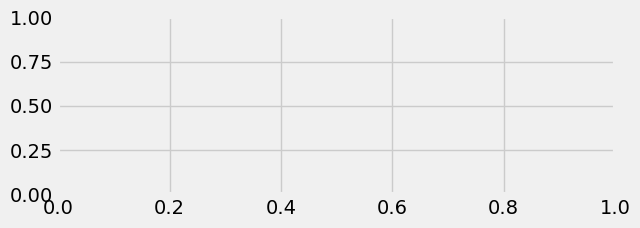

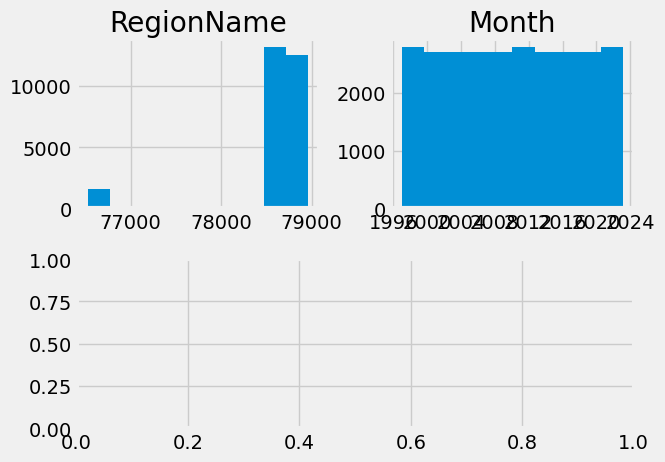

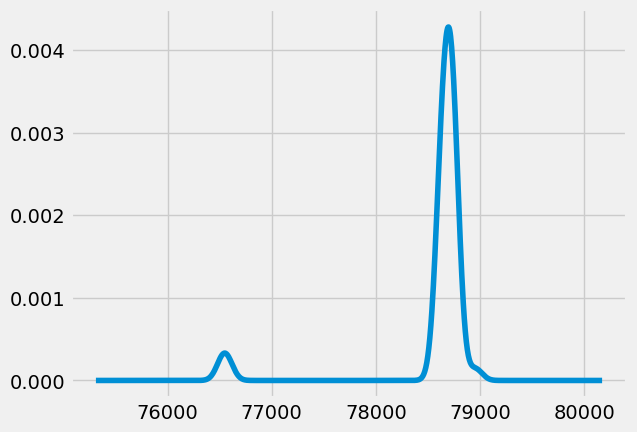

In [312]:
plt.figure(1)
plt.subplot(211)
dfm.hist()
plt.subplot(212)
dfm.plot(kind='kde')
plt.show()

In [314]:
dfm.set_index('Month', inplace = True)


In [316]:
from statsmodels.tsa.stattools import adfuller
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return pd.Series(diff)
 
X = dfm.values
X = X.astype('float32')
# difference data
months_in_year = 12
stationary = difference(X, months_in_year)
stationary.index = dfm.index[months_in_year:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
# save
stationary.to_csv('stationary.csv')
# plot
stationary.plot()
pyplot.show()

ValueError: setting an array element with a sequence.

In [322]:
df2017 = dfm['1997':'2017']
month_avg = df2011.groupby('Month')['MeanValue'].mean()

<AxesSubplot:xlabel='Month'>

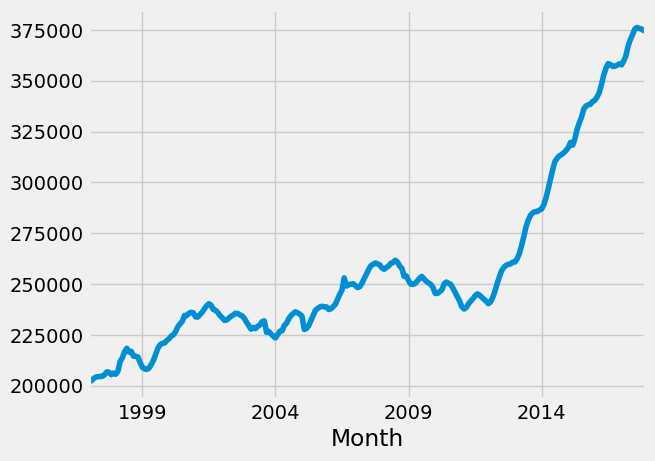

In [318]:
month_avg.plot()


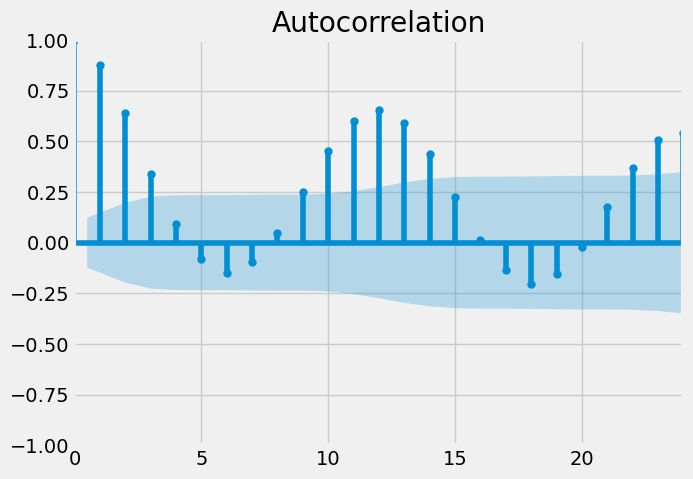

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


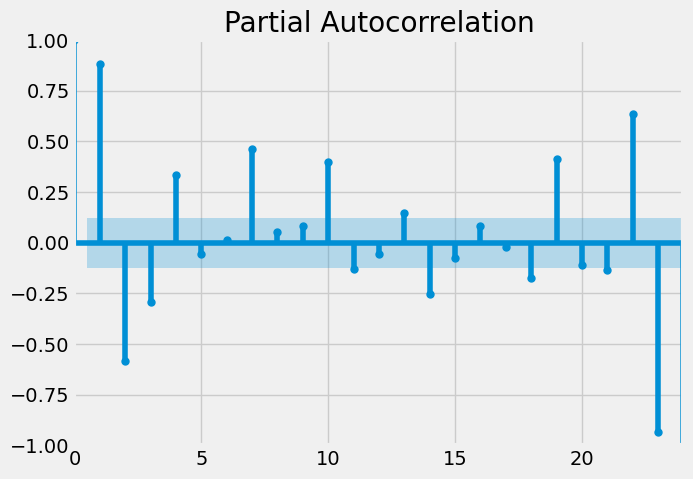

In [320]:

rcParams['figure.figsize']=7,5
plot_acf(month_avg.diff(periods=3).bfill()); plt.xlim(0,24); plt.show()
plot_pacf(month_avg.diff(periods=3).bfill()); plt.xlim(0,24); plt.ylim(-1,1);plt.show()

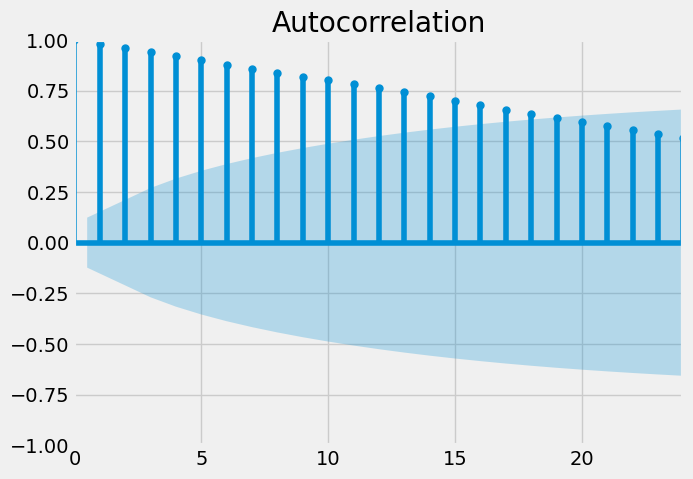

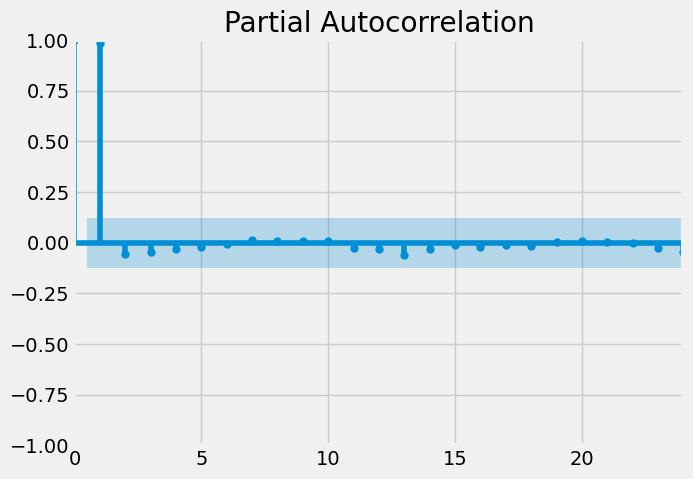

In [321]:
plot_acf(month_avg); plt.xlim(0,24); plt.show()
plot_pacf(month_avg); plt.xlim(0,24); plt.ylim(-1,1);plt.show()

In [324]:
df2017

,RegionName,MeanValue
Month,,
1997-01-31,78660,176622.5188
1997-01-31,78666,NaN
1997-01-31,78641,184092.3896
1997-01-31,78613,210441.8794
1997-01-31,78745,157975.3609
...,...,...
2017-12-31,78656,186304.4068
2017-12-31,76578,238271.5358
2017-12-31,78632,257527.7650


In [326]:
for pindex in range(2):
    for qindex in range(2):
        p = pindex + 1
        q = qindex + 1
        zillow_arima_model = sm.tsa.arima.ARIMA(df2017['Month'], order = (p,1,q)).fit()
        print('AR:', p, 'MA:', q, 'AIC:', zillow_arima_model.aic)
# for first differenced ER models searched, AR p=2 MA q=2 is best
ER_arima_model_selected = sm.tsa.arima.ARIMA(df2017['Month'], order = (2,1,2)).fit()
# fitted parameters of the selected model
print(ER_arima_model_selected.params)
# look-ahead forecasts needed 

KeyError: 'Month'

In [342]:
test_data = pd.read_csv('dataset.csv')
test_data['Month'] = pd.to_datetime(test_data['Month'], format='%m/%d/%y')


In [344]:
for pindex in range(2):
    for qindex in range(2):
        p = pindex + 1
        q = qindex + 1
        zillow_arima_model = sm.tsa.arima.ARIMA(test_data['Month'], order = (p,1,q)).fit()
        print('AR:', p, 'MA:', q, 'AIC:', zillow_arima_model.aic)
# for first differenced ER models searched, AR p=2 MA q=2 is best
ER_arima_model_selected = sm.tsa.arima.ARIMA(test_data['Month'], order = (2,1,2)).fit()
# fitted parameters of the selected model
print(ER_arima_model_selected.params)
# look-ahead forecasts needed 

"""
# Fit the ARIMA model on the training data
model =sm.tsa.arima.ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.forecast(steps=len(test_data))[0]

# Calculate the root mean squared error (RMSE) of the predictions
rmse = np.sqrt(mean_squared_error(test_data, predictions))

# Plot the predictions against the actual test data
plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.title(f'ARIMA Model (RMSE = {rmse:.2f})')
plt.legend()
plt.show()"""


UFuncTypeError: ufunc 'subtract' cannot use operands with types dtype('<m8[ns]') and dtype('O')

In [230]:
df_merged = pd.merge(crime_data, df_austin_pred, on=['RegionName', 'RegionName'])
df_merged

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,RegionName,GO Census Tract,GO X Coordinate,GO Y Coordinate,Value
0,"201,610,892",4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753.0,18.23,"3,129,181","10,106,923",126362.3642
1,"201,610,892",4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753.0,18.23,"3,129,181","10,106,923",126803.1530
2,"201,610,892",4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753.0,18.23,"3,129,181","10,106,923",127987.2070
3,"201,610,892",4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753.0,18.23,"3,129,181","10,106,923",127437.2679
4,"201,610,892",4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753.0,18.23,"3,129,181","10,106,923",128556.9281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9371215,"20,165,041,557",8.0,THEFT,Theft,7-Oct-16,7900 FM 1826 RD ...,N,12-Oct-16,D,78737.0,17.33,"3,068,105","10,054,936",857429.9988
9371216,"20,165,041,557",8.0,THEFT,Theft,7-Oct-16,7900 FM 1826 RD ...,N,12-Oct-16,D,78737.0,17.33,"3,068,105","10,054,936",843964.8395
9371217,"20,165,041,557",8.0,THEFT,Theft,7-Oct-16,7900 FM 1826 RD ...,N,12-Oct-16,D,78737.0,17.33,"3,068,105","10,054,936",830483.5492
9371218,"20,165,041,557",8.0,THEFT,Theft,7-Oct-16,7900 FM 1826 RD ...,N,12-Oct-16,D,78737.0,17.33,"3,068,105","10,054,936",819458.2984
